#Assignment 2:
    test the difference between a Binomial/Poisson distribution and a Gaussian distribution as you change the parameters of the Binomial/Poisson. Use: 
    
    1) KS
    
    2) KL or Chisq
    
    3) AD
    
    6 test total (8 if you are ambitious and want to try Pearson's chisq)
    
    i want you to use the scipy.stats package for this. it will provide tests. For KS and AD you will simply need to generate the distribution the normal will be tested agains: the KS and AD functions in scipy have functionality to test against standard distributions (normal, chisq etc) without you having to code up anything about the distribution itself. KL and chisq do not. I am showing you how to do the AD, KS and KL for binomial, you can replicate it for the poisson or do the Chisq instead of KL.
    
    even if you just replicate it... PLEASE UNDESRTAND IT! or you will have learned nothing and wasted both of our times

In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import json
import os
import csv
import urllib2
import scipy.stats
%pylab inline

from __future__ import print_function
__author__='djc'

url = urllib2.urlopen("https://raw.githubusercontent.com/fedhere/PUI2015_fbianco/master/fbb_matplotlibrc.json")
s = json.load(url)
pl.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


/Users/Daynan/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


here are the manual pages fo the tests
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html#scipy.stats.kstest
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html#scipy.stats.anderson
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html#scipy.stats.entropy

In [2]:
# for reproducibility, let's set the random seed
np.random.seed(32)

#generate the distribution
dist_n = np.random.randn(1000)

#ks and ad test for normal vs normal
print ("normal on normal", scipy.stats.kstest(dist_n,'norm'))
print ("normal on normal", scipy.stats.anderson(dist_n, dist='norm'))
print ("") 

# set p
p = .85
dist_b = np.random.binomial(1, p, 1000)

# ks and ad test for binomial vs normal
print ("binomial on normal", scipy.stats.kstest(dist_b,'norm'))
print ("binomial on normal", scipy.stats.anderson(dist_b, dist='norm'))

threshold = scipy.stats.anderson(dist_n, dist='norm')[1][scipy.stats.anderson(dist_n, dist='norm')[2]==[1.0]]
print (threshold)

##what is this threshold I am saving??

normal on normal (0.02545934352403445, 0.53587526075119662)
normal on normal (0.27671768231368787, array([ 0.574,  0.653,  0.784,  0.914,  1.088]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

binomial on normal (0.67934474606854289, 0.0)
binomial on normal (289.03143695303856, array([ 0.574,  0.653,  0.784,  0.914,  1.088]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
[ 1.088]


####What is the threshold?

AD returns 3 values: AD statistic, the critical values for various significance levels, and those significance levels. We're calling for the nested element in the 2nd set "[1] - critical values" which matches a specific value "1.0" in the 3rd set "[2] - significance levels"...which yields us the critical value for 1% signficance: 1.088.

##For "Normal on normal" distribution:

##Null hypothesis: the given distribution ("dist_n") and a model distribution ("normal") are identical or follow the distribution drawn by a similar population. Significance level alpha = 0.05.

####KS TEST
The KS statistic is somewhat close to 0, (0.0254), indicating a small or negligible difference between the two distributions. However, with a p-value of 0.5359, it is not significant at the p=0.05 level.

The Null is not rejected. We cannot say they are not identical distributions.

####AD TEST
The AD statistic (0.2767) is below the critical value at the 5% significance level (0.784), so the null is not rejected. Again, we cannot say they are not identical distributions.


##For "Binomial on normal" distribution:

##Null hypothesis:  the given distribution ("dist_b") and a model distribution ("normal") are identical or follow the distribution drawn by a similar population. Significance level alpha = 0.05.

####KS TEST
The KS statistic is closer to 1 (0.6793), indicating a larger difference between the two distributions. With a pvalue of 0.0 (or nearly that), it is significant at the p=0.05 level. 

The Null hypothesis is rejected. We can say they are not identical distributions.

####AD TEST
The AD statistic (289.031) is well above the 5% critical value at the significance level (0.784), so the null is rejected. Again, we can say they are not identical.

In [3]:
distpdf_n, mybins_n, = np.histogram(dist_n, density=True)
distpdf_b, mybins_b, = np.histogram(dist_b, density=True)

In [4]:
#get the bin centers
bincenters_n = mybins_n[:-1] + 0.5*(mybins_n[1] - mybins_n[0])
bincenters_b = mybins_b[:-1] + 0.5*(mybins_b[1] - mybins_b[0])
print ("normal on normal", scipy.stats.entropy(distpdf_n, scipy.stats.norm.pdf(bincenters_n)))  
print ("poisson on normal", scipy.stats.entropy(distpdf_b, scipy.stats.norm.pdf(bincenters_b))) 

normal on normal 0.00472191498931
poisson on normal 2.08233528818


##KL Divergence
This is comparing the entropy or "disorder" of two distributions. The greater the entropy value returned (a difference in levels of entropy?), the greater the divergence of the two distributions and the less likely they are identical.

##"Normal on normal" -- Null hypothesis: the given distribution ("dist_n") is identical to the model distribution ("normal"). 

The entropy value returned is quite small, 0.0047. We do not reject the null hypothesis, so we cannot say the distributions are not identical.

##"Poisson on normal" -- Null hypothesis: the given distribution ("dist_b") is identical to the model distribution ("normal").

The entropy value returned is fairly sizable, 2.0823. We reject the null hypothesis. We can say the distributions are not identical.

#BINOMIAL

In [5]:
#generate empty arrays
np.random.seed(32)
narray = range(1,50,1)
ks_b = np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))
chi2_b = np.zeros(len(narray))

def mynorm (x, mu, var):
    return scipy.stats.norm.cdf(x, loc=mu, scale=var)

for i,n in enumerate(narray):
    #generate the binomial distribution
    mydist = np.random.binomial(n, p, 1000)
    
    #run the tests. return ks/ad statistics for each distribution
    ks_b[i] = scipy.stats.kstest(mydist, mynorm, args=(n*p, n*p*(1.0-p)))[0]
    ad_b[i] = scipy.stats.anderson(mydist, dist='norm')[0]
    
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins=np.linspace(min(mydist),max(mydist), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])

    kl_b[i] =  scipy.stats.entropy(np.histogram(mydist, bins=mybins)[0], scipy.stats.norm.pdf(bincenters, loc=n*p, scale=n*p*(1.0-p)))
    
    chi2_b[i] = scipy.stats.chi2.pdf(mydist,df=(n-1),loc=n*p,scale=n*p*(1.0-p))[0]

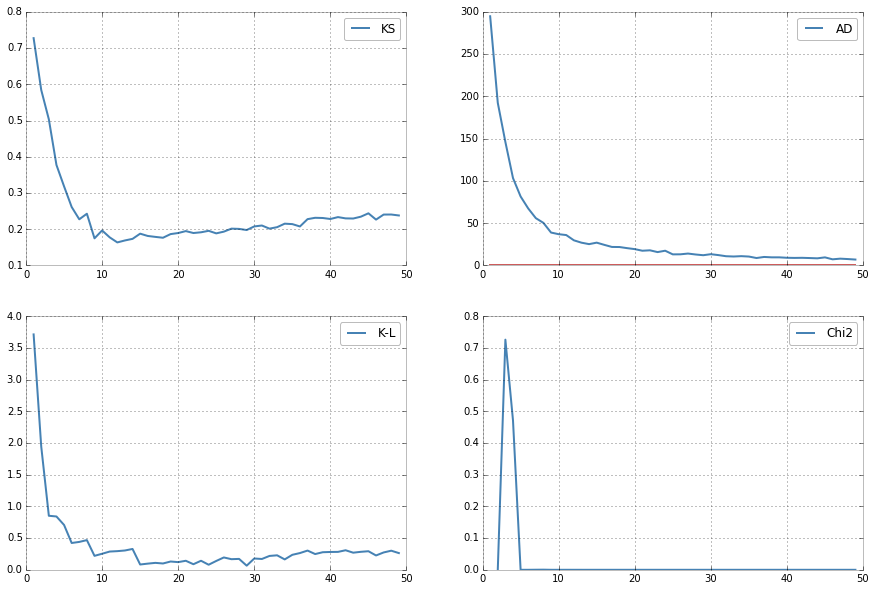

In [6]:
fig = pl.figure(figsize = (15,10))
fig.add_subplot(221)
pl.plot(narray, ks_b, label='KS')
pl.legend()

fig.add_subplot(222)
pl.plot(narray, ad_b,  label='AD')
pl.plot([narray[0], narray[-1]],[threshold, threshold])
pl.plot()
pl.plot()
pl.legend()

fig.add_subplot(223)
pl.plot(narray, kl_b, label='K-L ')

pl.legend()

fig.add_subplot(224)
pl.plot(narray, chi2_b, label="Chi2")
pl.legend()

##In each plot, we have x-axis -- sample size (n=1, n=2,...n=50) plotted against y-axis --- test statistic, for each of the following: Upper left: KS test, Upper right: AD test, Lower left: K-L divergence test, Lower right: Chi-square test

In each test, you see a general trend such that as sample size gets larger, the test statistic tightens around a central tendency. 

Due to Central Limit Theorem, as a sample size gets sufficient large, its distribution approximates normal distribution. These plots bear that out for the binomial distribution that's being plotted: the tests compare it to a normal distribution and as the sample sizes get bigger, the test statistics get less significant (less likely to reject the null that the binomial and normal distributions are identical): KS and KL converge around a non-zero correlation, and AD and Chi2 converge on zero.

####This is difficult to see with only a sample size of 50, but increasing the sample size to 10x or more more clearly shows the converging test statistics. Let's try the exact plot above, but with 500 sample arrays, everything else (including random generator) is the exact same.

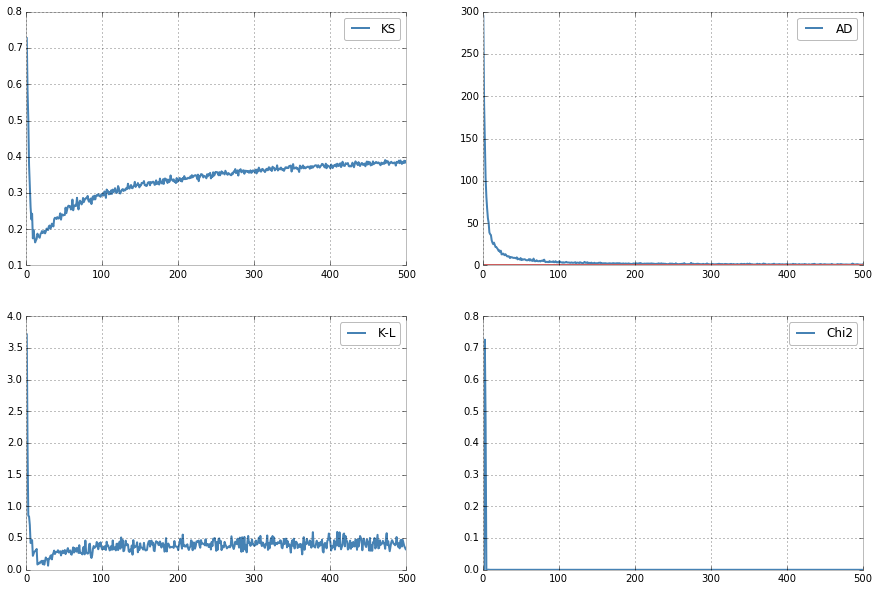

In [7]:
#generate empty arrays
np.random.seed(32)

# this time, we'll go to 500
narray = range(1,500,1)
ks_b = np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))
chi2_b = np.zeros(len(narray))


def mynorm (x, mu, var):
    return scipy.stats.norm.cdf(x, loc=mu, scale=var)

for i,n in enumerate(narray):
    #generate the binomial distribution
    mydist = np.random.binomial(n, p, 1000)
    
    #run the tests. return ks/ad statistics for each distribution
    ks_b[i] = scipy.stats.kstest(mydist, mynorm, args=(n*p, n*p*(1.0-p)))[0]
    ad_b[i] = scipy.stats.anderson(mydist, dist='norm')[0]
    
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins=np.linspace(min(mydist),max(mydist), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])

    kl_b[i] =  scipy.stats.entropy(np.histogram(mydist, bins=mybins)[0], scipy.stats.norm.pdf(bincenters, loc=n*p, scale=n*p*(1.0-p)))
    
    chi2_b[i] = scipy.stats.chi2.pdf(mydist,df=(n-1),loc=n*p,scale=n*p*(1.0-p))[0]

fig = pl.figure(figsize = (15,10))
fig.add_subplot(221)
pl.plot(narray, ks_b, label='KS')
pl.legend()

fig.add_subplot(222)
pl.plot(narray, ad_b,  label='AD')
pl.plot([narray[0], narray[-1]],[threshold, threshold])
pl.plot()
pl.plot()
pl.legend()

fig.add_subplot(223)
pl.plot(narray, kl_b, label='K-L ')

pl.legend()

fig.add_subplot(224)
pl.plot(narray, chi2_b, label="Chi2")
pl.legend()

#POISSON
Setting sample size range to n=1,n=2...n=500.

In [8]:
# resetting empty arrays - and setting sample range to 500 again
np.random.seed(32)
narray = range(1,500,1)
ks_b = np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))
chi2_b = np.zeros(len(narray))

def mynorm (x, mu, var):
    return scipy.stats.norm.cdf(x, loc=mu, scale=var)

for i,n in enumerate(narray):
    #generate the poisson distribution
    posdist = np.random.poisson(n, 1000)
    #run the tests. 
    ks_b[i] = scipy.stats.kstest(posdist, mynorm, args=(n, n))[0]
    ad_b[i] = scipy.stats.anderson(posdist, dist='norm')[0]
        
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins = np.linspace(min(posdist),max(posdist), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])
 
    kl_b[i] =  scipy.stats.entropy(np.histogram(posdist, bins=mybins)[0], scipy.stats.norm.pdf(bincenters, loc=n*p, scale=n*p*(1.0-p)))
    
    chi2_b[i] = scipy.stats.chi2.pdf(posdist,df=(n-1),loc=n*p,scale=n*p*(1.0-p))[0]
    

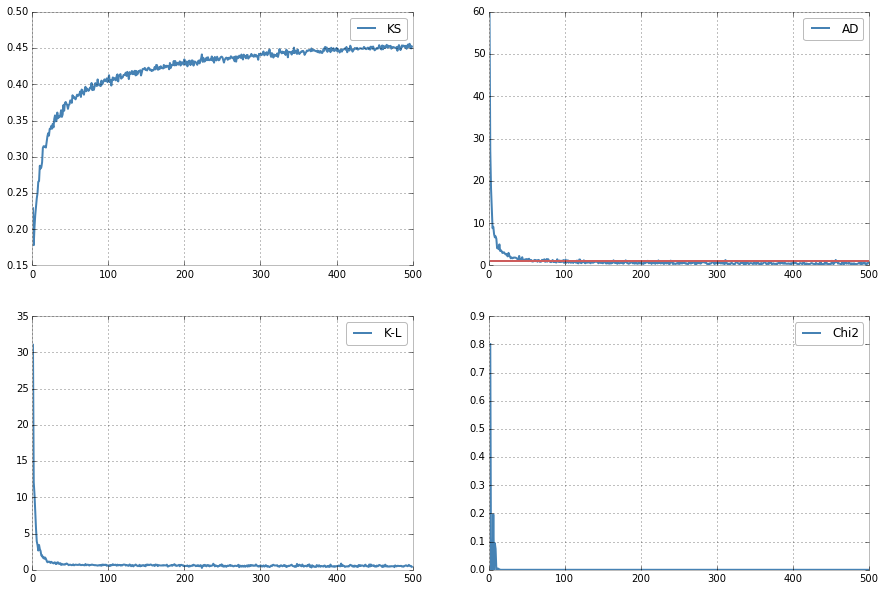

In [9]:
# plot them
fig = pl.figure(figsize = (15,10))
fig.add_subplot(221)
pl.plot(narray, ks_b, label='KS')
pl.legend()

fig.add_subplot(222)
pl.plot(narray, ad_b,  label='AD')
pl.plot([narray[0], narray[-1]],[threshold, threshold])
pl.plot()
pl.plot()
pl.legend()

fig.add_subplot(223)
pl.plot(narray, kl_b, label='K-L ')

pl.legend()

fig.add_subplot(224)
pl.plot(narray, chi2_b, label="Chi2")
pl.legend()

####While noting the scale difference in KS and KL graphs, everything trends generally the same as before: namely around a central tendency, further supporting the approximation to normal distribution with sufficiently large sample sizes.

##TOTALLY OPTIONAL fun with KL: the KL divergence is a measure of how much approximation you have to do to represent one distribution with the other. you can see what it looks point by point, before you integrate and get a single distance number

-0.386471531548
-40.1949736318
-10.9205886381


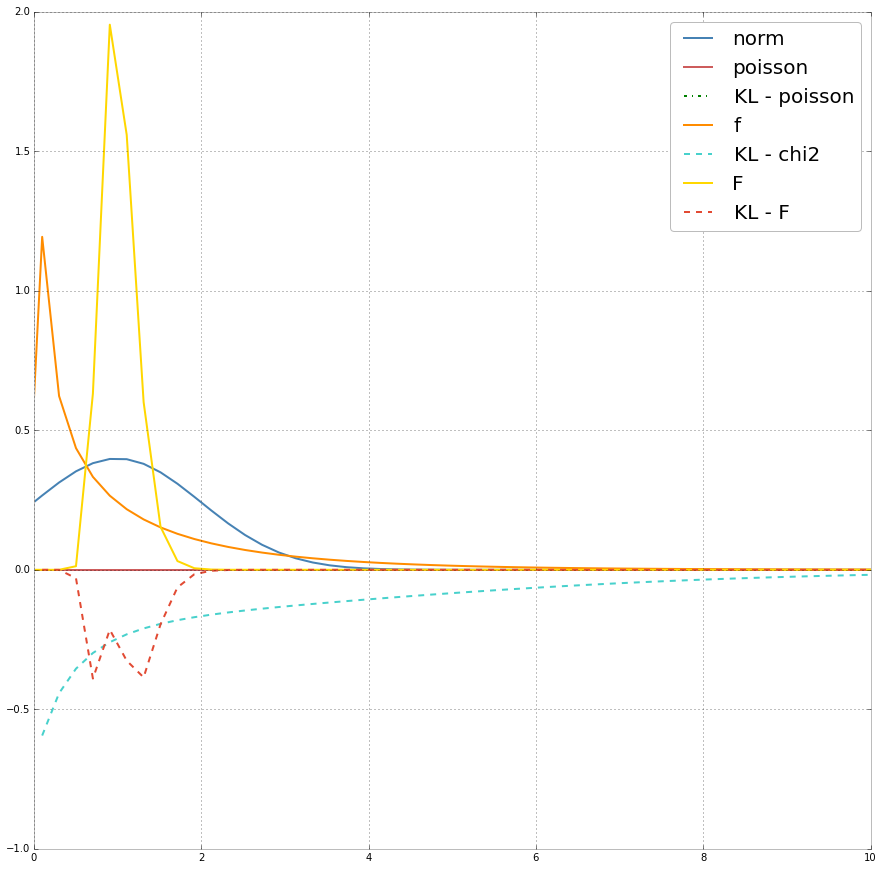

In [10]:
pl.figure(figsize=(15,15))

p = lambda x, mu : scipy.stats.distributions.poisson.pmf(x,mu)
q = lambda x, mu : scipy.stats.distributions.norm.pdf(x-mu)
c = lambda x, mu : scipy.stats.distributions.chi2.pdf(x, df=mu)
f = lambda x, mu : scipy.stats.distributions.f.pdf(x,100,100)

Dkl = lambda x ,mu, p :  p(x, mu)* np.log10(q(x, mu)) + p(x, mu) *np.log10(p(x, mu))

def model(x) : 
    return 1./(s*np.sqrt(2*np.pi))*exp(-((x-m)/2./2./s)**2)

x=np.linspace(-10,10,100)
pl.plot(x, q(x,1), label='norm')
pl.plot(x, p(x,1), label='poisson')
pl.plot(x, Dkl(x, 1, p), '-.', label = 'KL - poisson')

print (np.nansum(Dkl(np.linspace(0,30,1000), 1, p)))


pl.plot(x, c(x,1), label='f')
pl.plot(x,Dkl(x, 1, c), '--', label = 'KL - chi2')



print (np.nansum(Dkl(np.linspace(0,30,1000), 1, c)))


pl.plot(x, f(x,1), label='F')
pl.plot(x,Dkl(x, 1, f), '--', label = 'KL - F')

print (np.nansum(Dkl(np.linspace(0,30,1000), 1, f)))
bins = np.arange(0, 99, 10)

pl.xlim(0,10)
pl.legend( fontsize = 20)

###As stated before, with sufficient sample size, every distribution approximates normal distribution. I'm unclear what the x axis indicates (log number of approximations?)...but there's convergence toward a mean after 10 units. Perhaps in terms of physics, this is analogous to the 2nd law of thermodynamics??... given enough time/iterations, entropy increases to the point where everything is uniformly, indistinctively disorderd...